In [1]:
#import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
import sqlite3

import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
shakhesha = ['shakes_kol','shakes_bazar_aval','shakes_sanaat','shakes_kol_hamvazn','shakhes_sanaye_boorsi',
          'shakhes_topfifty','shakhes_toptherty','shakhes_vazni_arzeshi']

In [3]:
from persiantools.jdatetime import JalaliDate
# change date from shamsi to miladi!
def convert_to_gregorian(j_date):
    j_year, j_month, j_day = map(int, j_date.split('-'))
    g_date = JalaliDate(j_year, j_month, j_day).to_gregorian()
    return g_date.strftime('%Y-%m-%d')


# Loading data from Daily Index (شاخص) csv files
riz = ['kol','aval','sanat','hamvazn','sanaye','tfifty','therty','vazarz']
shakhes = []
for shak,sym in zip(shakhesha,riz):
    df_shak = pd.read_csv(f'{shak}.csv')
    df_shak = df_shak[['J-Date','Adj Close']]
    df_shak = df_shak.rename(columns={'Adj Close': sym , 'J-Date':'date'})
    df_shak['date'] = df_shak['date'].apply(convert_to_gregorian)
    # convert object to datetime64
    df_shak['date'] = pd.to_datetime(df_shak['date'])
    shakhes.append(df_shak)

In [4]:
kol = shakhes[0].copy(deep=True)
aval = shakhes[1].copy(deep=True)
sanat = shakhes[2].copy(deep=True)
hamvazn = shakhes[3].copy(deep=True)
sanaye = shakhes[4].copy(deep=True)
tfifty = shakhes[5].copy(deep=True)
therty = shakhes[6].copy(deep=True)
vazarz = shakhes[7].copy(deep=True)
shakhes_list = [kol,aval,sanat,hamvazn,sanaye,tfifty,therty,vazarz]

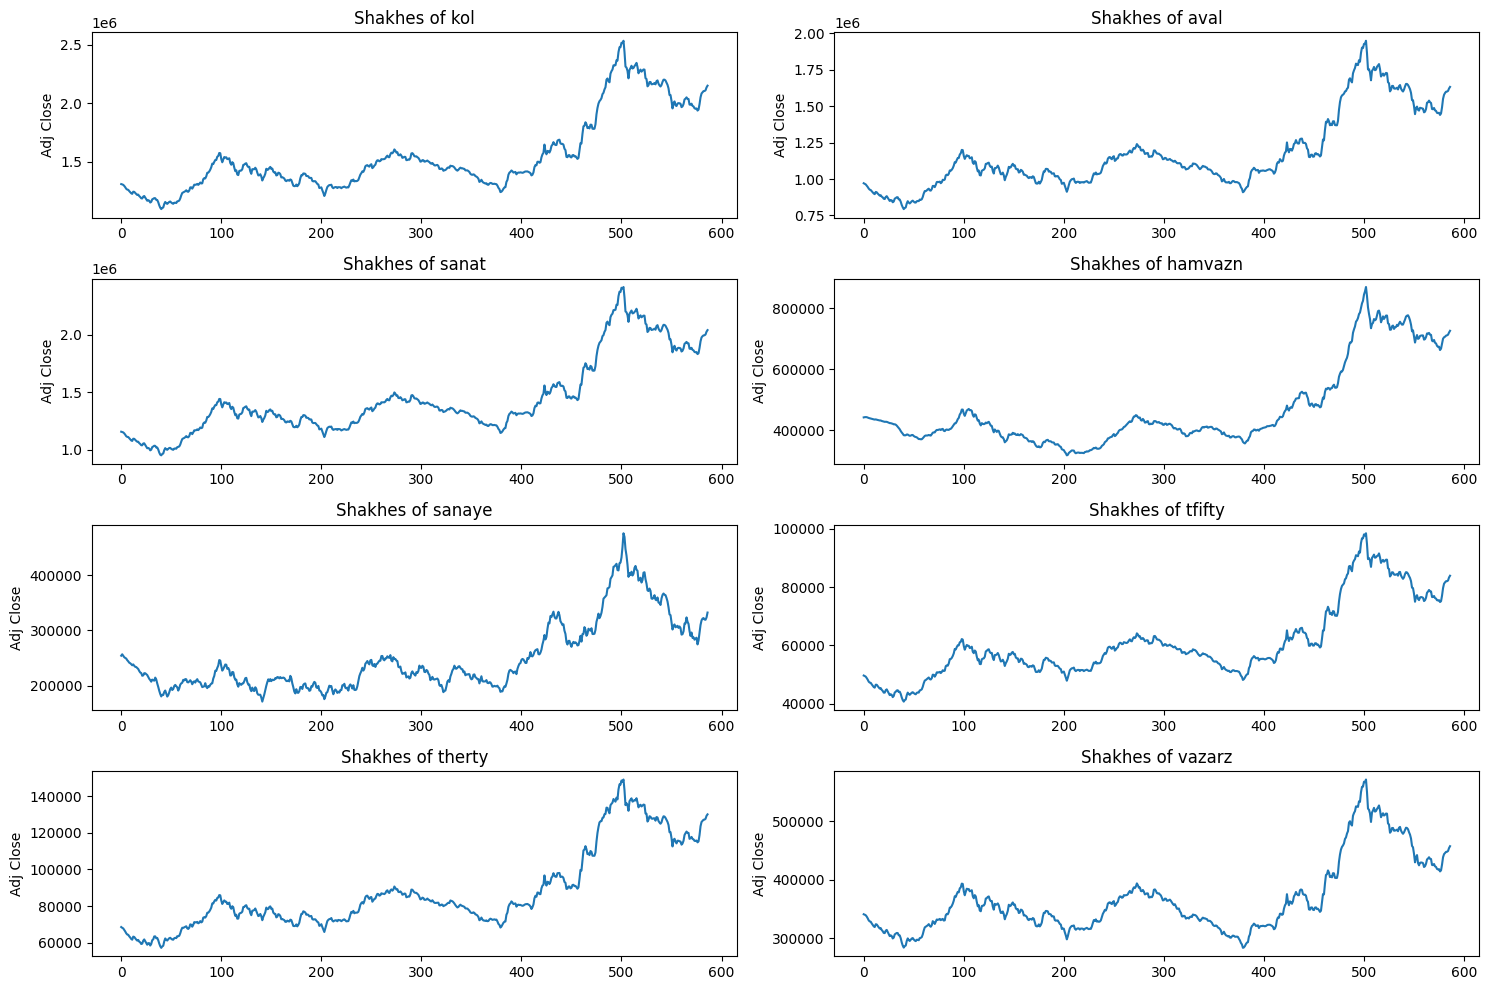

In [11]:
# Let's see a historical view of the closing Index
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (shakhes,r) in enumerate(zip(shakhes_list,riz), 1):
    plt.subplot(4, 2, i)
    v = shakhes.iloc[:,1]
    v.plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Shakhes of {r}")

plt.tight_layout()

In [12]:
from functools import reduce

main_close_df = pd.DataFrame()

# Merge the dataframes based on their 'date' columns
main_merged_df = reduce(lambda left, right: pd.merge(left, right, on='date', how='outer'), shakhes_list)
main_close_df = main_merged_df.sort_values('date')
main_close_df.set_index('date', inplace=True)

# Print the resulting dataframe
print(main_close_df)

                  kol       aval      sanat   hamvazn    sanaye   tfifty  \
date                                                                       
2021-03-27  1309561.6   970984.0  1155860.0  441834.0  254380.0  49616.8   
2021-03-28  1306887.8   966864.0  1152970.0  442552.0  256906.0  49446.0   
2021-03-30  1303193.7   963105.0  1149840.0  442839.0  254416.0  49229.5   
2021-03-31  1294521.6   954691.0  1141580.0  442648.0  251681.0  48749.3   
2021-04-03  1282948.7   945340.0  1129980.0  441120.0  250306.0  48179.9   
...               ...        ...        ...       ...       ...      ...   
2023-08-30  2104683.8  1599800.0  1994380.0  710508.0  322495.0  82034.3   
2023-09-02  2105644.4  1600710.0  1995080.0  711667.0  319817.0  82047.6   
2023-09-03  2111648.6  1605130.0  2002160.0  713639.0  319441.0  82271.3   
2023-09-04  2136144.2  1621810.0  2026590.0  720883.0  323660.0  83325.8   
2023-09-05  2150975.3  1632580.0  2040110.0  726460.0  332468.0  83911.7   

           

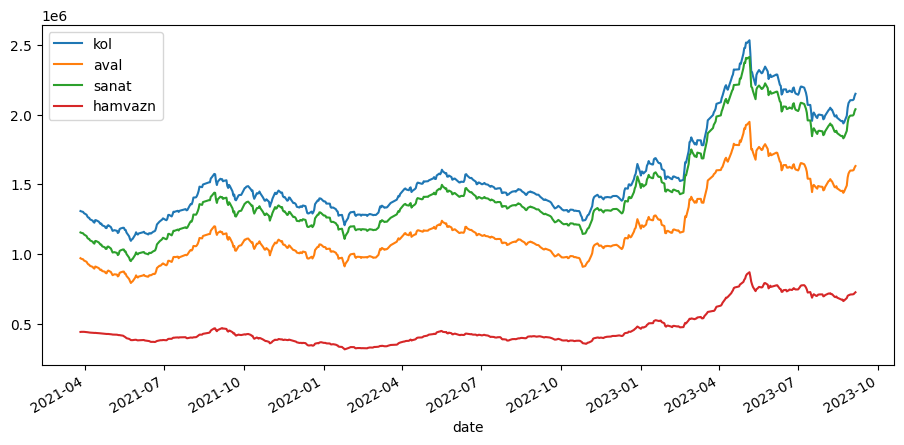

In [13]:
fig = main_close_df[['kol', 'aval', 'sanat','hamvazn']].plot().get_figure()
fig.set_size_inches(11, 5)
# Show the plot
plt.show()

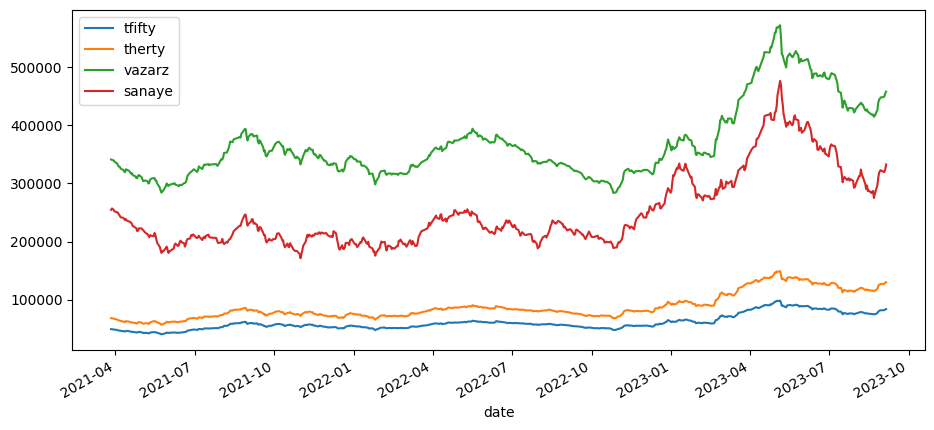

In [14]:
fig2 = main_close_df[['tfifty', 'therty','vazarz','sanaye']].plot().get_figure()
fig2.set_size_inches(11, 5)
# Show the plot
plt.show()

Text(0.5, 1.0, 'Correlation of Main Shakhes HA! ')

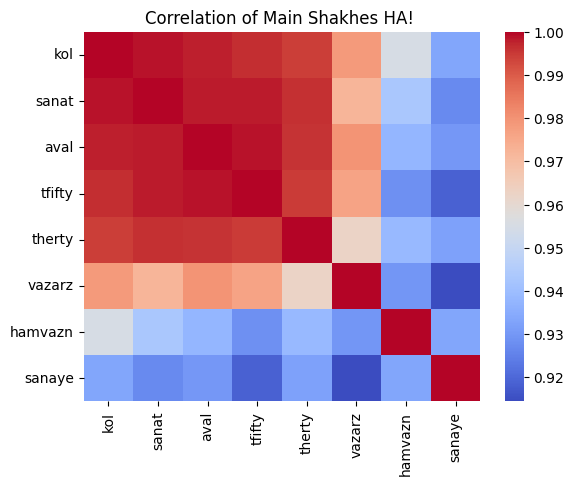

In [15]:
main_cor_matrix = main_merged_df[['kol','sanat', 'aval', 'tfifty', 'therty', 'vazarz','hamvazn','sanaye']].corr()
sns.heatmap(main_cor_matrix , cmap = 'coolwarm' , annot = False)
plt.title('Correlation of Main Shakhes HA! ')

Text(0.5, 1.0, 'Relationship of kol and tfifty')

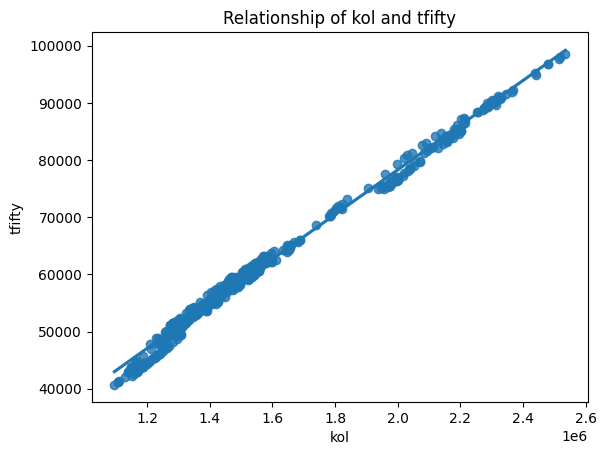

In [17]:
sns.regplot(x = main_close_df[['kol']], y = main_close_df[['tfifty']], data= main_close_df)
plt.title("Relationship of kol and tfifty")

Text(0.5, 1.0, 'Relationship of kol and aval')

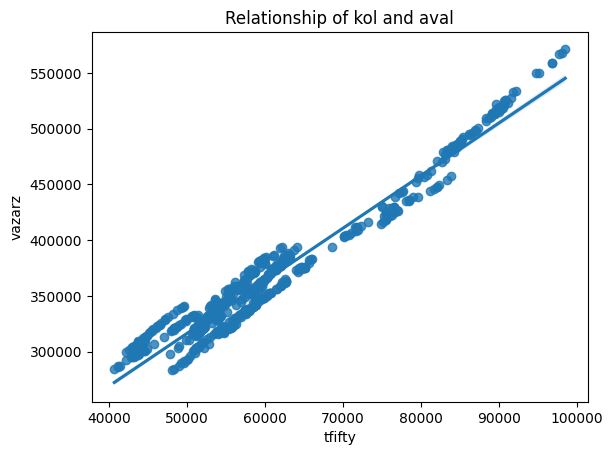

In [18]:
sns.regplot(x = main_close_df[['tfifty']], y = main_close_df[['vazarz']], data= main_close_df)
plt.title("Relationship of kol and aval")

Text(0.5, 1.0, 'Relationship of kol and tfifty')

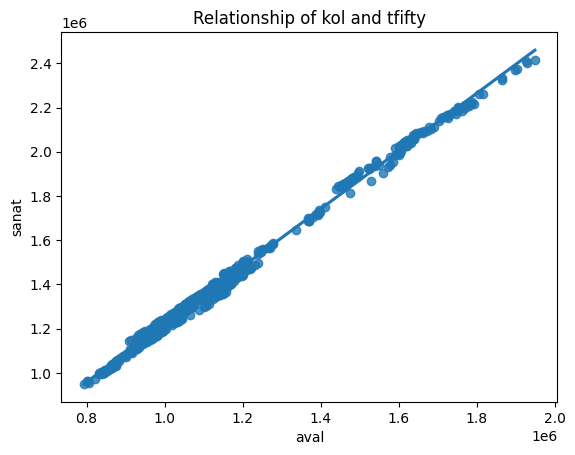

In [19]:
sns.regplot(x = main_close_df[['aval']], y = main_close_df[['sanat']], data= main_close_df)
plt.title("Relationship of kol and tfifty")